In [58]:
#Importo librerías que voy a usar

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# # graficos incrustados
# %matplotlib inline

In [28]:
path_compu = r"/Users/lucasmartene/Desktop/"
nombrefile="objects"
file_path = path_compu+nombrefile+".csv"

df = pd.read_csv(file_path,low_memory=False) #meto en df

In [35]:
print("La data tiene {} rows y {} columnas".format(df.shape[0], df.shape[1]))
print(" ")
print("Preview de la estructura de la data:")
print(" ")
df.head(5)

La data tiene 462651 rows y 40 columnas
 
Preview de la estructura de la data:
 


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [37]:
#Primera vista de la estructura de la data
df.describe(include= "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,462651,462651,c:1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entity_type,462651,4,Person,226708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entity_id,462651.0,NaN,NaN,NaN,132915.761775,88768.946816,1.0,45249.5,143072.0,213868.5,286215.0
parent_id,27715,11972,c:2728,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,462649,445204,Bob Hebig,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalized_name,462620,439326,bob hebig,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
permalink,462651,462435,/person/bob-hebig-4,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_code,123186,42,software,17922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,462651,9,operating,443663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded_at,100441,6323,2011-01-01,3937,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Tipo de datos
df.dtypes

id                      object
entity_type             object
entity_id                int64
parent_id               object
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width               int64
logo_height              int64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds        int64
invested_companies       int64
first_funding_at        object
last_funding_at         object
funding_rounds           int64
funding_

In [42]:
#valido nulls en cada columna
df.isna().sum()

id                          0
entity_type                 0
entity_id                   0
parent_id              434936
name                        2
normalized_name            31
permalink                   0
category_code          339465
status                      0
founded_at             362210
closed_at              459842
domain                 287709
homepage_url           287709
twitter_username       336562
logo_url               253801
logo_width                  0
logo_height                 0
short_description      455034
description            367646
overview               227416
tag_list               356155
country_code           367608
state_code             407891
city                   371967
region                      0
first_investment_at    445695
last_investment_at     445695
investment_rounds           0
invested_companies          0
first_funding_at       431144
last_funding_at        431144
funding_rounds              0
funding_total_usd           0
first_mile

In [57]:
#Valido si hay data duplicada
print("La data tiene {} rows duplicadas".format(sum(df.duplicated())))

La data tiene 0 rows duplicadas


# EDA

In [49]:
# genero lista de columnas que me parecen interesantes
columnas_deseadas = ['entity_type', 'status','category_code','country_code']

In [64]:
#Obtengo una distribución de los valores de esas columnas

for i in columnas_deseadas:
    counts = df[i].value_counts()[:25] # me quedo con los primeros 25 en orden descendente
    print(f"Conteo de valores para la columna '{i}':\n{counts}\n")
    print("")

Conteo de valores para la columna 'entity_type':
Person          226708
Company         196553
Product          27738
FinancialOrg     11652
Name: entity_type, dtype: int64


Conteo de valores para la columna 'status':
operating      443663
acquired         9394
live             4349
closed           2773
ipo              1134
beta              780
development       226
private           219
alpha             113
Name: status, dtype: int64


Conteo de valores para la columna 'category_code':
software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security 

In [128]:
df['status_binary']=df['status'].apply(lambda x : "closed" if x == "closed" else "alive")

In [136]:
counts_cat = df['category_code'].value_counts()[:10]
print(counts_cat)

software       17922
web            15118
other          13617
ecommerce       9065
games_video     7520
mobile          6862
advertising     6098
consulting      5006
enterprise      4441
biotech         4430
Name: category_code, dtype: int64


In [153]:
cats_seleccion = ['software', 'web','ecommerce','games_video','biotech','advertising']

In [154]:
df_categoria_filtrada = df[df['category_code'].isin(cats_seleccion)]

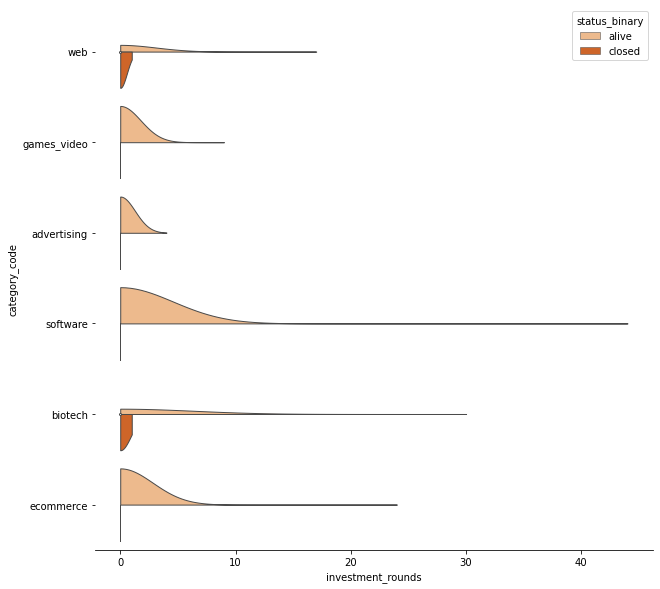

In [241]:
sns.set_palette("Blues")
plt.figure(figsize=(10,10))

# Me quedo solo con las compañias
sns.violinplot(x='investment_rounds', y ='category_code', hue="status_binary", data=df_categoria_filtrada[df_categoria_filtrada['entity_type'] == 'Company'], palette="Oranges", bw=10,
               cut=0, linewidth=1, inner= 'box', split = True,orient ="h", scale="area")
sns.despine(left=True)


#No quedó como esperaba, tenia interes en entender el ratio de startups que no lograron progresar (o que no estan en carrera a hacerlo) por categoria

### En qué categoría opera cada startup?

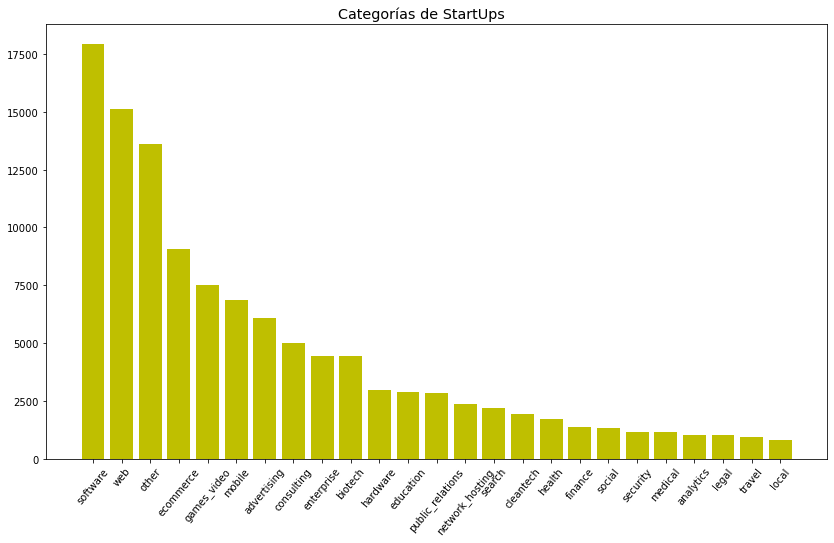

In [195]:
#principales 25 categorías

plt.rcParams['figure.figsize'] = 14,8

height = df['category_code'].value_counts()[:25].tolist()
bars =  df['category_code'].value_counts()[:25].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.8 ,color= ['y'])
plt.xticks(y_pos, bars)
plt.xticks(rotation=50)
plt.title("Categorías de StartUps", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

### Cuándo se fundaron?

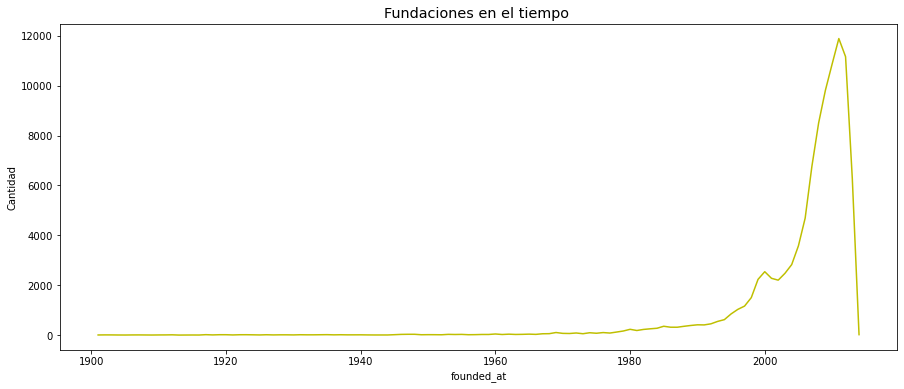

In [203]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors = 'coerce' ) #casteo data de obkjet a datetime


plt.rcParams['figure.figsize'] = 15,6
df['name'].groupby(df["founded_at"].dt.year).count().plot(kind="line",color= ['y'])

plt.ylabel('Cantidad')
plt.title("Fundaciones en el tiempo ", fontdict=None, size = 'x-large')
plt.show()

## Qué pasa con Argentina?

Las principales compañias son de EEUU, pero analicemos Argy:

In [224]:
#armo un nuevo df agrupando para organizar la data
df['count'] = 1
country_market = df[['count','country_code','category_code']].groupby(['country_code','category_code']).agg({'count': 'sum'})

country_market_pct = country_market.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

In [227]:
#selecciono Arg
ARG_market_pct = country_market_pct[country_market_pct['country_code'] == "ARG"]
ARG_market_pct = ARG_market_pct.sort_values('count',ascending = False)[0:10]
ARG_market_pct

,country_code,category_code,count
85,ARG,software,21.052632
88,ARG,web,13.815789
58,ARG,advertising,12.171053
63,ARG,ecommerce,11.184211
68,ARG,games_video,8.552632
75,ARG,mobile,5.592105
78,ARG,other,4.276316
62,ARG,consulting,3.618421
84,ARG,social,2.960526
80,ARG,public_relations,2.960526


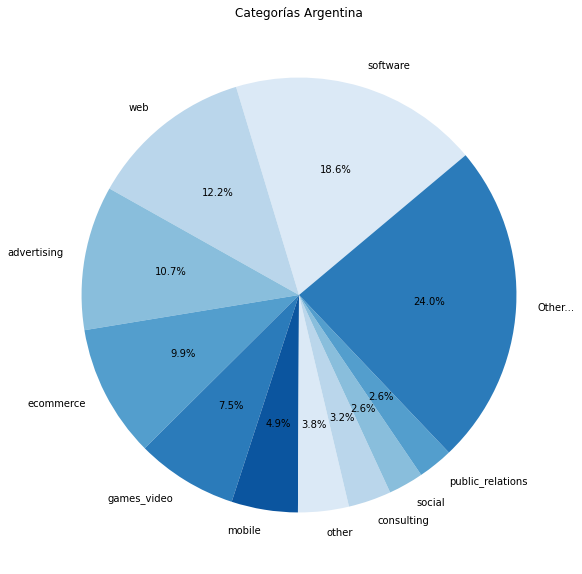

In [239]:
plt.rcParams['figure.figsize'] = 10,10
labels = list(ARG_market_pct['category_code'])+['Other...']
plt.pie(sizes,labels=labels, autopct='%1.1f%%',shadow=False, startangle=40)
plt.title("Categorías Argentina")
plt.show()